# Ucitati podatke

In [2]:
# 1. Ucitati podatke (kolona y 'da li je klijent uplatio oroceni depozit')
import pandas as pd

dataUri = r'C:\Users\damir.pajaziti\Desktop\anakonda\Data\bank-additional.csv'
dataSeparators = [';','|', '/']

bank = pd.read_csv(dataUri, sep = dataSeparators[0])

# Deskriptivna statistika

In [3]:
# 2. Deskriptivna statistika
print('Statistical described attributes: \n')
print(bank.describe())
print('---------------------------------------------------------------------------\n')

print('IsNull for each column: \n')
print(bank.isnull().sum(axis=0))
print('---------------------------------------------------------------------------\n')

print('Data types:\n')

df = pd.DataFrame(bank)

print(df.dtypes)
print('---------------------------------------------------------------------------\n')

Statistical described attributes: 

               age     duration     campaign        pdays     previous  \
count  4119.000000  4116.000000  4114.000000  4119.000000  4117.000000   
mean     40.113620   256.869048     2.534273   960.422190     0.190430   
std      10.313362   254.763913     2.566673   191.922786     0.541904   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.250000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  
count   4116.000000     4117.000000    4117.000000  4117.000000  
mean       0.084694       93.579540     -40.486358     4.858993  
std        1.563361        0.579442       4.639840    79.432456  
min       -3.400000       92.2010

# Ukloniti null vrednosti i razdvojiti numericke i kategoricke podatke

In [4]:
# 3. Pripremiti skup podataka tako da bude pogodan za prediktivno modelovanje

# Ukloniti null vrednosti za labele
bank = df.dropna()
        # provera: print(bank.isnull().sum(axis=0))

# mapiranje yes no u 0 i 1
outcome = bank['y']

class_map = {'yes':1, 'no':0}

# napraviti labelu od kolone y - pretvoriti je u numericku vrednost
outcame = outcome.map(class_map)

bank_num = bank.select_dtypes(exclude = ['object'])
bank_cat = bank.select_dtypes(include = ['object'])

# setujem samo input kolone za PCI
bank_cat = bank_cat.loc[:, bank_cat.columns != 'y']

print('Categorical data')
print(bank_cat.count())

print('Numeric data')
print(bank_num.count())

    # Dodati outcame kolonu # bank_num['y'] = outcame
    # print(bank_num)

    # provera null vrednosti
    #bank_num.isnull().sum(axis=0)

    # bank_cat.describe()

    # bank_cat['job'].value_counts()

Categorical data
job            4098
marital        4098
education      4098
default        4098
housing        4098
loan           4098
contact        4098
month          4098
day_of_week    4098
poutcome       4098
nr.employed    4098
dtype: int64
Numeric data
age               4098
duration          4098
campaign          4098
pdays             4098
previous          4098
emp.var.rate      4098
cons.price.idx    4098
cons.conf.idx     4098
euribor3m         4098
dtype: int64


# Determine OUTLIERS

In [5]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(bank_num))

np.where(z > 3)

(array([   5,   20,   20,   38,   41,   49,   52,   55,   59,   61,   67,
          67,   78,   82,  126,  127,  138,  141,  147,  147,  147,  150,
         150,  158,  159,  160,  162,  175,  183,  188,  199,  200,  223,
         223,  256,  256,  275,  281,  285,  285,  312,  319,  330,  332,
         332,  336,  371,  395,  409,  409,  414,  414,  435,  436,  436,
         438,  451,  453,  464,  471,  481,  486,  504,  513,  523,  542,
         555,  566,  574,  574,  574,  590,  594,  594,  604,  623,  642,
         642,  656,  657,  669,  671,  678,  678,  679,  679,  679,  688,
         696,  702,  715,  717,  727,  732,  732,  736,  748,  754,  754,
         765,  775,  778,  806,  817,  835,  866,  883,  885,  891,  891,
         926,  926,  934,  944,  944,  950,  956,  961,  973,  976,  983,
        1001, 1012, 1025, 1025, 1032, 1041, 1044, 1059, 1067, 1075, 1075,
        1077, 1082, 1094, 1095, 1102, 1162, 1168, 1169, 1169, 1194, 1195,
        1198, 1213, 1236, 1239, 1239, 

# Kreirati Dummy kolone za kategoricke podatke. Funkcija get_dummies

In [6]:
bank_cat = pd.get_dummies(bank_cat)
bank_cat.head()

# print(bank_cat.count())
# print(bank_num.count())

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191,nr.employed_5195.8,nr.employed_5228.1
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Normalizacija

In [7]:
from sklearn.preprocessing import MinMaxScaler

tempArray = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' ]

bank_num_normalized = bank_num[tempArray] 

scaler = MinMaxScaler()

scaler.fit(bank_num_normalized)

bank_num_normalized = scaler.transform(bank_num_normalized)

bank_num_normalized = pd.DataFrame(bank_num_normalized)

bank_num_normalized.columns = tempArray

# bank_num_normalized

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
# radim dummy coding Bynary
allDt = pd.concat([bank_cat, bank_num], axis = 1) 
#allDt.count()
allDt

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,nr.employed_5228.1,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,0,1,0,0,0,0,0,0,0,0,...,0,30,487.0,2.0,999,0.0,-1.8,92.893,-46.2,1.313
1,0,0,0,0,0,0,0,1,0,0,...,0,39,346.0,4.0,999,0.0,1.1,93.994,-36.4,4.855
2,0,0,0,0,0,0,0,1,0,0,...,1,25,227.0,1.0,999,0.0,1.4,94.465,-41.8,4.962
3,0,0,0,0,0,0,0,1,0,0,...,1,38,17.0,3.0,999,0.0,1.4,94.465,-41.8,4.959
4,1,0,0,0,0,0,0,0,0,0,...,0,47,58.0,1.0,999,0.0,-0.1,93.200,-42.0,4.191
5,0,0,0,0,0,0,0,1,0,0,...,0,32,128.0,3.0,999,2.0,-1.1,94.199,-37.5,0.884
6,1,0,0,0,0,0,0,0,0,0,...,0,32,290.0,4.0,999,0.0,-1.1,94.199,-37.5,0.879
7,0,0,1,0,0,0,0,0,0,0,...,0,41,44.0,2.0,999,0.0,-0.1,93.200,-42.0,4.191
8,0,0,0,0,0,0,0,1,0,0,...,0,31,68.0,1.0,999,1.0,-0.1,93.200,-42.0,4.153
10,0,0,0,0,0,0,0,1,0,0,...,1,25,301.0,1.0,999,0.0,1.4,93.918,-42.7,4.958


# Podeliti podatke na trening i test setove

In [10]:
from sklearn.model_selection import train_test_split

# x = training , y = test
X = allDt
y = outcome

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
    #X_train.head()

    # provera
    # X_train.count()
    # print(X_train.count())
    # print(X_test.count())


      job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0              0                1                 0              0   
1              0                0                 0              0   
2              0                0                 0              0   
3              0                0                 0              0   
4              1                0                 0              0   
5              0                0                 0              0   
6              1                0                 0              0   
7              0                0                 1              0   
8              0                0                 0              0   
10             0                0                 0              0   
11             0                0                 0              0   
12             1                0                 0              0   
13             0                1                 0              0   
14             1    

In [11]:
X_train.describe()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,nr.employed_5228.1,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,...,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000
mean,0.246862,0.213738,0.035914,0.026499,0.078452,0.041492,0.037657,0.094840,0.018480,0.167015,...,0.403766,40.308229,256.823919,2.575314,962.300558,0.196304,0.085425,93.577912,-40.552371,3.619256
std,0.431261,0.410015,0.186107,0.160643,0.268928,0.199461,0.190398,0.293044,0.134702,0.373055,...,0.490737,10.333530,252.606231,2.681873,187.369181,0.560433,1.564735,0.581913,4.584052,1.734909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,47.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,88.000000,3253.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000


# Analiza Glavnih komponenti 

In [15]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

np.set_printoptions(suppress=True)

pca = PCA(n_components = 5)
pca.fit(X_train)

explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

pca.components_

# X_train.head()

array([[ 0.00003842,  0.00001277,  0.00000244, -0.00000597, -0.00000372,
         0.00004314, -0.00000229, -0.00003058,  0.00000261, -0.00004962,
        -0.00000475, -0.00000245,  0.        ,  0.0000057 , -0.00000685,
         0.00000115,  0.00002726, -0.00002369, -0.00002195,  0.00000941,
         0.        ,  0.00002282, -0.00002488,  0.00001103,  0.00001325,
        -0.00001245, -0.00000081,  0.00002347, -0.00000007, -0.0000234 ,
         0.00001492, -0.00000007, -0.00001485,  0.00008287, -0.00008287,
         0.00003698, -0.0000795 ,  0.00000894,  0.00005691, -0.00001992,
         0.00001127, -0.00003282,  0.00000672,  0.00000791,  0.00000351,
         0.00001135, -0.00002388,  0.00000686,  0.00003172, -0.00002605,
         0.00000084, -0.00004746,  0.00004662, -0.00000104,  0.0000254 ,
         0.00001349,  0.00000434,  0.00000908, -0.00000144,  0.00001666,
        -0.00000014, -0.00001471,  0.00001484, -0.00006647,  0.00195689,
         0.99836124, -0.00098322, -0.05718028,  0.0

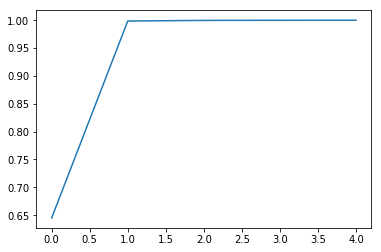

In [13]:
plt.plot(cum_var)
plt.show()

In [16]:
explained_var

array([0.64508083, 0.35344417, 0.00107735, 0.00021438, 0.00007506])

# Kreirati klaster modele

In [17]:
from sklearn.cluster import KMeans

# print(X_train.head())

kmeans_algorithm = KMeans(n_clusters = 3, max_iter = 100)

print(kmeans_algorithm)

cluster_model = kmeans_algorithm.fit(X_train)
centers = cluster_model.cluster_centers_

centers
# print(centers)

    # outliers

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


array([[  0.24248662,   0.21902017,   0.03746398,   0.02717168,
          0.07698641,   0.03417044,   0.03664059,   0.09757102,
          0.01729107,   0.17208728,   0.0308769 ,   0.00823384,
          0.11198024,   0.61877316,   0.26677645,   0.00247015,
          0.09962948,   0.06834088,   0.14203376,   0.2173734 ,
          0.        ,   0.12350762,   0.31370935,   0.03540552,
          0.80609304,   0.19349527,   0.00041169,   0.44750926,
          0.0259366 ,   0.52655414,   0.80773981,   0.0259366 ,
          0.16632359,   0.62988884,   0.37011116,   0.0465212 ,
          0.16220667,   0.0049403 ,   0.17126389,   0.13132977,
          0.00946892,   0.34005764,   0.10539317,   0.01605599,
          0.01276245,   0.18814327,   0.20625772,   0.2070811 ,
          0.20008234,   0.19843557,   0.11321531,   0.88678469,
         -0.        ,   0.01605599,   0.01235076,   0.00988061,
          0.02140799,   0.00452861,   0.03499382,   0.20337587,
          0.00041169,   0.18279127,   0.

In [150]:
X_train.shape

(2868, 73)

In [151]:
clusters = cluster_model.predict(X_train)
clusters

array([0, 1, 1, ..., 1, 2, 1])

# Napraviti posebne data setove za svaki klaster

In [152]:
# pravim kopiju x train-a
X_train_copy = X_train

# dodajem kolonu klaster i kolonu outcame
X_train_copy['Cluster'] = clusters
X_train_copy['Outcame'] = outcame

cluster1_train = X_train_copy.loc[X_train_copy['Cluster'] == 0]
cluster2_train = X_train_copy.loc[X_train_copy['Cluster'] == 1]
cluster3_train = X_train_copy.loc[X_train_copy['Cluster'] == 2]

print('Distribucija 0 klastera: ')
print(cluster1_train.shape)
print('Distribucija 1 klastera: ')
print(cluster2_train.shape)
print('Distribucija 2 klastera: ')
print(cluster3_train.shape)

cluster1_train.head()


Distribucija 0 klastera: 
(333, 75)
Distribucija 1 klastera: 
(2429, 75)
Distribucija 2 klastera: 
(106, 75)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,Cluster,Outcame
1276,0,1,0,0,0,0,0,0,0,0,...,530.0,1.0,999,0.0,1.1,93.994,-36.4,4.857,0,0
4008,0,0,0,0,1,0,0,0,0,0,...,658.0,3.0,999,1.0,-0.1,93.200,-42.0,4.153,0,0
2232,1,0,0,0,0,0,0,0,0,0,...,1105.0,2.0,999,0.0,1.4,93.918,-42.7,4.960,0,1
597,0,0,0,0,0,0,0,0,0,1,...,861.0,6.0,999,1.0,-1.8,93.075,-47.1,1.405,0,0
2742,0,0,0,0,0,0,1,0,0,0,...,1221.0,1.0,999,0.0,-0.1,93.200,-42.0,4.021,0,0


# Definisanje algoritma logisticke regresije za svaki pod dataset

In [153]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

lr_cluster1 = LogisticRegression(solver = 'lbfgs', max_iter = 10000, class_weight='balanced')
lr_cluster1.fit(cluster1_train.loc[:, cluster1_train.columns != 'Outcame'], cluster1_train.loc[:, cluster1_train.columns == 'Outcame'])
predictions_cluster1 = lr_cluster1.predict(cluster1_train.loc[:, cluster1_train.columns != 'Outcame'])

lr_cluster2 = LogisticRegression(solver = 'lbfgs', max_iter = 10000, class_weight='balanced')
lr_cluster2.fit(cluster2_train.loc[:, cluster2_train.columns != 'Outcame'], cluster2_train.loc[:, cluster2_train.columns == 'Outcame'])
predictions_cluster2 = lr_cluster2.predict(cluster2_train.loc[:, cluster2_train.columns != 'Outcame'])

lr_cluster3 = LogisticRegression(solver = 'lbfgs', max_iter = 10000, class_weight='balanced')
lr_cluster3.fit(cluster3_train.loc[:, cluster3_train.columns != 'Outcame'], cluster3_train.loc[:, cluster3_train.columns == 'Outcame'])
predictions_cluster3 = lr_cluster3.predict(cluster3_train.loc[:, cluster3_train.columns != 'Outcame'])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Izracunavanje matrice konfuzije po algoritmu

In [154]:
cm1 = confusion_matrix(cluster1_train.loc[:, cluster1_train.columns == 'Outcame'], predictions_cluster1)
cm2 = confusion_matrix(cluster2_train.loc[:, cluster2_train.columns == 'Outcame'], predictions_cluster2)
cm3 = confusion_matrix(cluster3_train.loc[:, cluster3_train.columns == 'Outcame'], predictions_cluster3)

In [155]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Prvi dataset matrica konfuzije

Normalized confusion matrix
[[0.76585366 0.23414634]
 [0.2734375  0.7265625 ]]


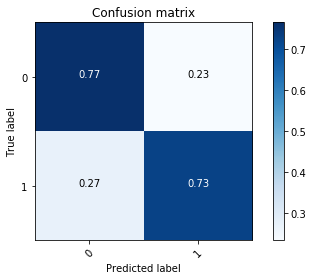

In [156]:
plot_confusion_matrix(cm1, [0,1], normalize = True)

# Drugi dataset matrica konfuzije

Normalized confusion matrix
[[0.88644214 0.11355786]
 [0.0619469  0.9380531 ]]


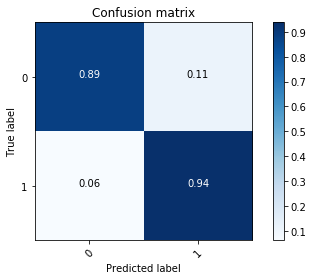

In [157]:
plot_confusion_matrix(cm2, [0,1], normalize = True)

# Treci dataset matrica konfuzije

Normalized confusion matrix
[[0.85       0.15      ]
 [0.10606061 0.89393939]]


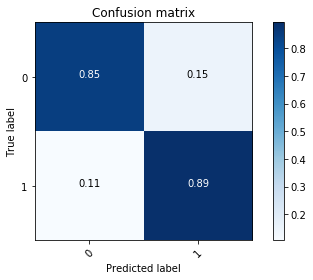

In [159]:
plot_confusion_matrix(cm3, [0,1], normalize = True)

In [160]:
y_train_map = y_train.map(class_map)


# Cross validation

In [161]:
# cross_val_score does cross validation and returns single score
from sklearn.model_selection import cross_val_score
# cross_validate allows evaluation based on multiple scores
from sklearn.model_selection import cross_validate


lr = LogisticRegression(solver = 'lbfgs', max_iter = 10000, class_weight='balanced')

#CV score returns performance metric for each fold

cv_score1= cross_val_score(lr, X_train, y_train_map, cv=5, scoring = 'precision')

print('Score by folds: {}'.format(cv_score1))
print('Mean of score: {}'.format(cv_score1.mean()))


Score by folds: [1.         0.98412698 1.         1.         1.        ]
Mean of score: 0.9968253968253968


# Pipelines

In [162]:
from sklearn.pipeline import Pipeline

In [163]:
pipe = Pipeline(steps=[('pca', pca), ('lr_balanced', lr)])

In [164]:
X_train_new = X_train

In [165]:
X_train_new = X_train_new.drop(['Outcame', 'Cluster'], axis=1)


In [135]:
#X_train_new

In [136]:
#y_train = y_train.map(class_map)

In [167]:
#y_train

In [168]:
model = pipe.fit(X_train_new, y_train)

In [169]:
pipe.predict(X_test)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)